## LGMVIP, May 2022
### Data Science Intern
#### Name: Sahil B. Jethva
#### Task 1:Iris Flowers Classification ML Project 
The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

#### Dataset Information : 
* Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

**Dataset Link**: (http://archive.ics.uci.edu/ml/datasets/Iris) 

- We'll use **Iris DataSet from the UCI Machine Learning Repository**.
- **Creator**: R.A. Fisher, **Donor**: Michael Marshall (MARSHALL%PLU '@' io.arc.nasa.gov)

**Attribute Information**:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. Species:
- Iris Setosa
- Iris Versicolour
- Iris Virginica





# Importing Necessary Libraries
* NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
* Pandas is a library written for the Python programming language for data manipulation and analysis
* Matplotlib is one of the most popular Python packages used for data visualization. It is a cross-platform library for making 2D plots from data in arrays.
* Seaborn is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis.
* Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python.
* Warnings are provided to warn the developer of situations that aren’t necessarily exceptions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlpb
import seaborn as sb
import csv
import warnings
warnings.filterwarnings("ignore")
sb.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Importing Data

In [19]:
columns = ["sepal length", "sepal width", "petal length", "petal width", "species"]
iris = pd.read_csv(r'C:\Users\SWAYAM\Downloads\iris.data', names = columns)
iris.head()# Displays first 5 rows

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
x = iris.iloc[:, [0, 1, 2, 3]].values
y = iris.iloc[:, -1].values

In [21]:
print("**Statistical summary of Dataset**")
iris.describe()

**Statistical summary of Dataset**


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
# any missing values in dataset
iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

# Frequency Distribution of Species 

In [24]:
# No. of rows for each species
iris_species = pd.crosstab(index=iris["species"], columns="count")
iris_species

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [25]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]

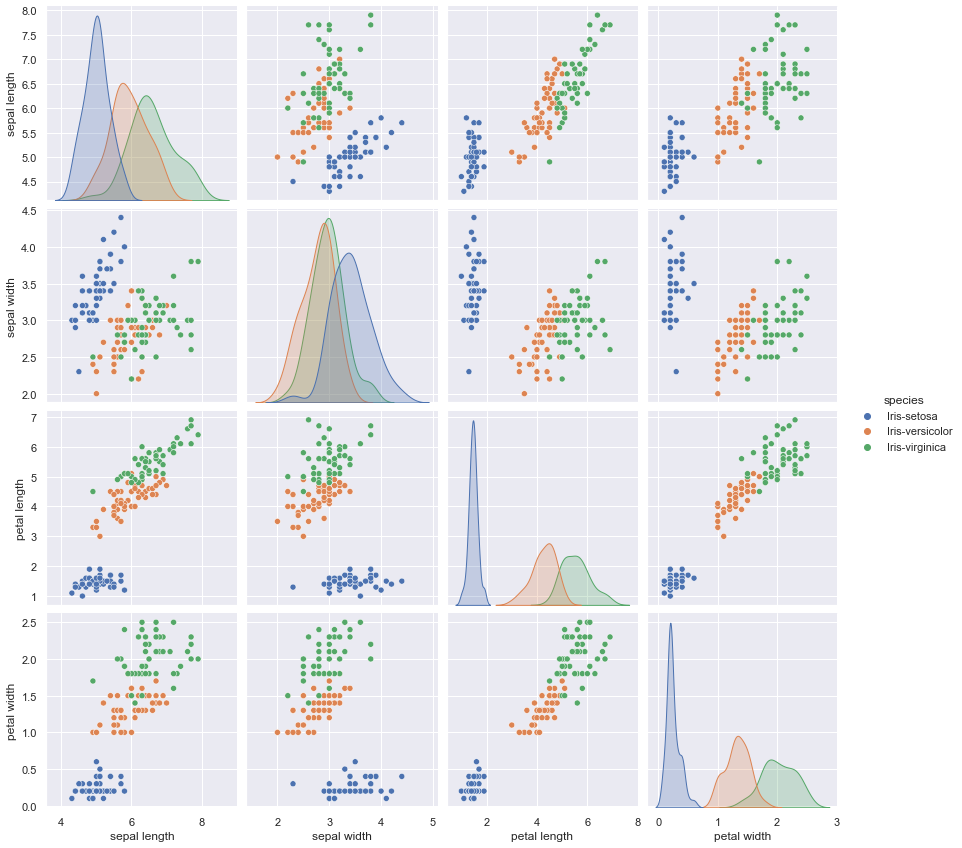

In [26]:
sb.set_style("darkgrid")
sb.pairplot(iris, hue="species", height=3);
mlpb.show()

In [27]:
#checking correlation in dataset
iris.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


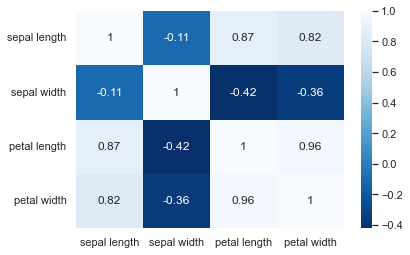

In [28]:
# visualizing correlation using heatmap
sb.heatmap(iris.corr(), annot = True, cmap = "Blues_r")
mlpb.show()

In [29]:
grp_data = iris.groupby("species").mean()
print(grp_data)

                 sepal length  sepal width  petal length  petal width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


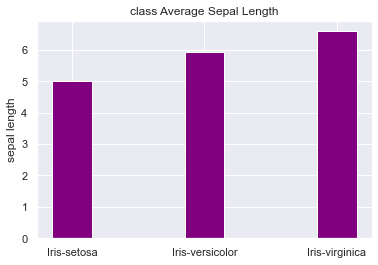

In [30]:
mlpb.bar(grp_data.index, grp_data["sepal length"], width=0.3, color = "purple")                                  

mlpb.title("class Average Sepal Length")
mlpb.ylabel("sepal length")
mlpb.show()

## Finding the optimum number of clusters for k-means classification

In [31]:
WCSS=[] # WCSS- Within Custer Sum of Square
for i in range(1,11):
    kmeans= KMeans(n_clusters =i, init = "k-means++", max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

WCSS

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.56163015873016,
 38.930963049671746,
 34.19068792479662,
 30.06387443273313,
 27.84235606060606,
 26.048202248044355]

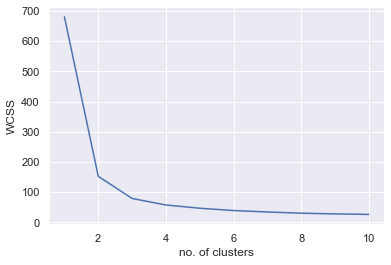

In [32]:
mlpb.plot(range(1,11), WCSS)
mlpb.xlabel("no. of clusters")
mlpb.ylabel("WCSS")
mlpb.show()

# Data Visualization

### Implementing K-means clustering

In [33]:
kmeans = KMeans(n_clusters= i, init = 'k-means++', max_iter = 500, n_init= 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


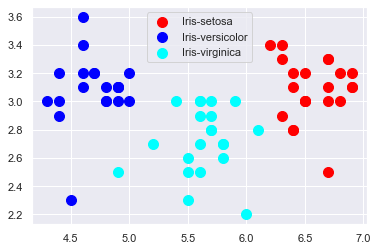

In [34]:
mlpb.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Iris-setosa')
mlpb.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Iris-versicolor')
mlpb.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='cyan', label='Iris-virginica')


mlpb.legend()

# Model building

## Supervised Machine Learning

#### Spliting data - Training and Testing Set 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size= 0.2, random_state=0)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Performance metrics - KNearestNeighbors

In [37]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred
accuracy = accuracy_score(y_test, pred)
print("accuracy :-", accuracy*100)
print(classification_report(y_test, pred))

accuracy :- 96.66666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

